<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Read in the Sacramento housing data set.

In [2]:
sac = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')

In [3]:
# A:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
import missingno as msno

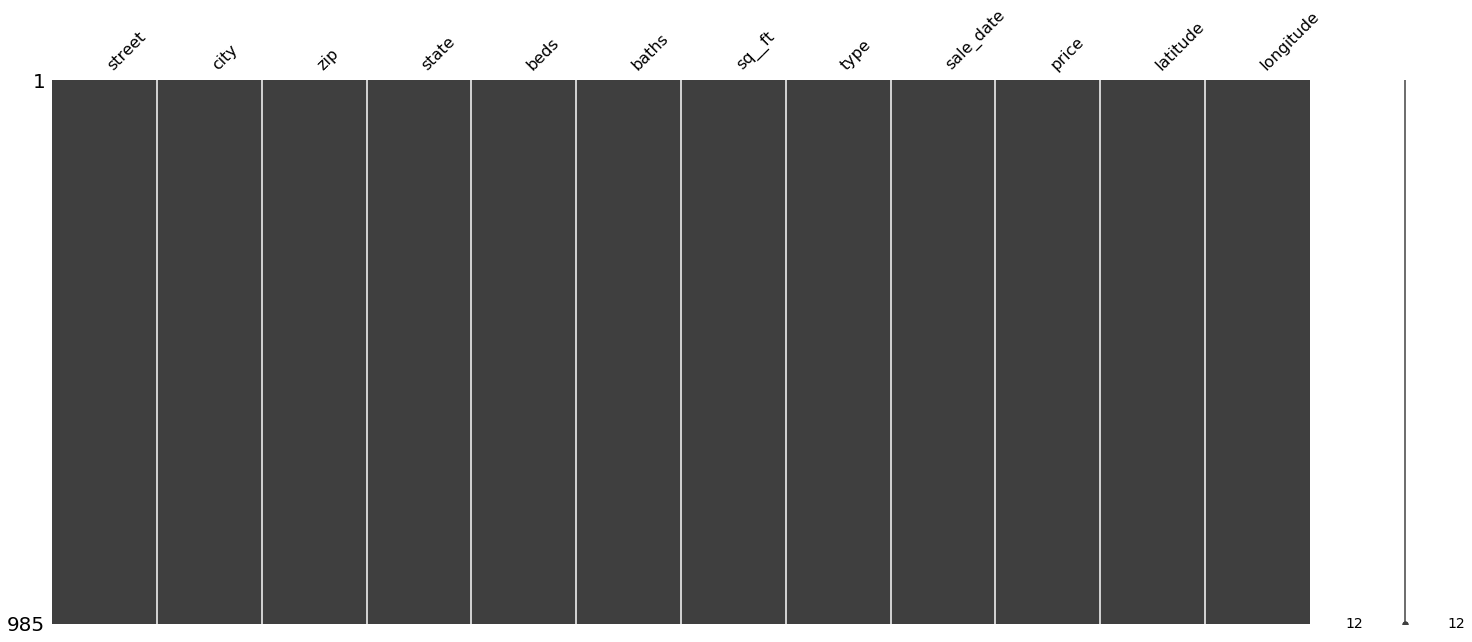

In [5]:
msno.matrix(sac) #check for null values
#no null based on observation

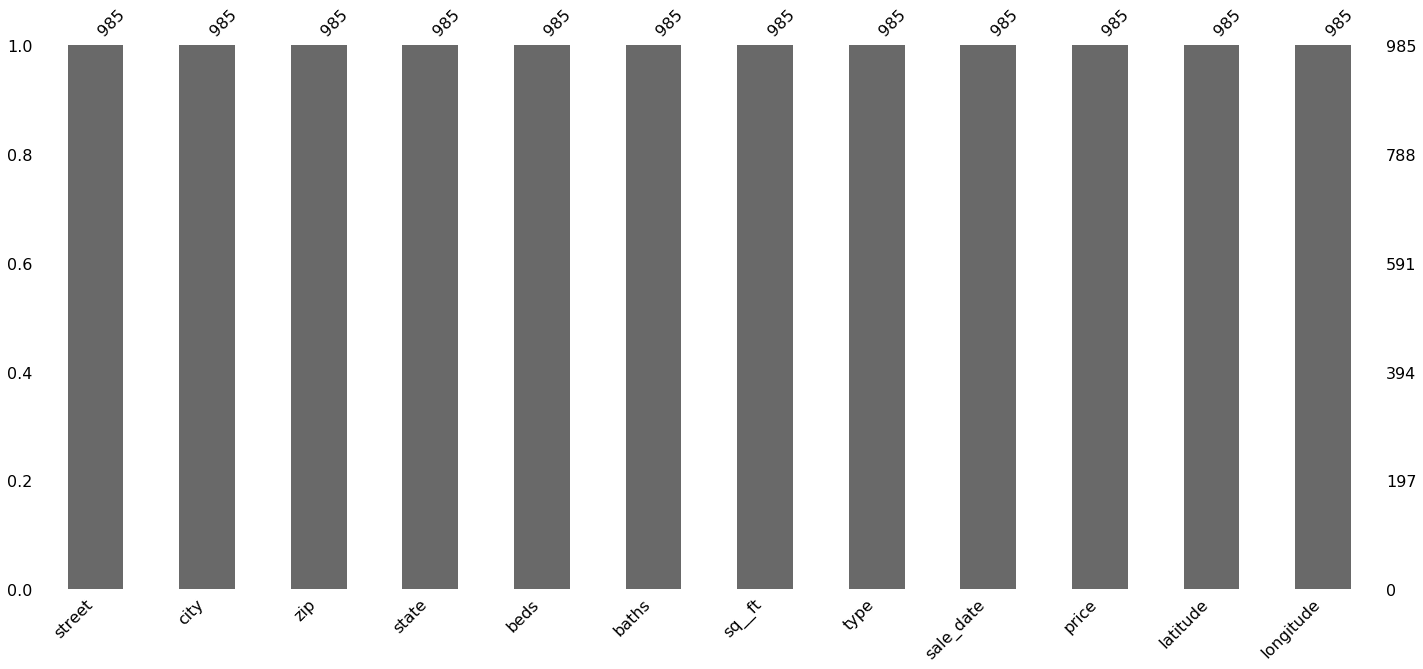

In [6]:
msno.bar(sac)

In [7]:
sac.isnull().sum() #nothing out of the ordinary

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
# A:
sac.info() #checking data types by columns
#latitude & longitude in float
#sale_date is an object convert to datetime?
#sq_ft is a column consider renaming

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [10]:
sac.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

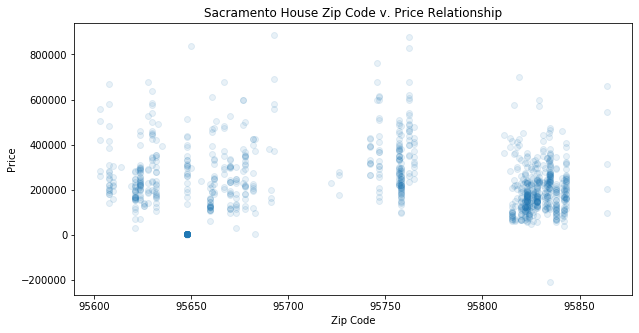

In [19]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of zip versus price.
plt.scatter(sac['zip'],
           sac['price'],
           alpha= 0.1)
    
plt.title("Sacramento House Zip Code v. Price Relationship")
plt.xlabel("Zip Code")
plt.ylabel("Price")
plt.show();

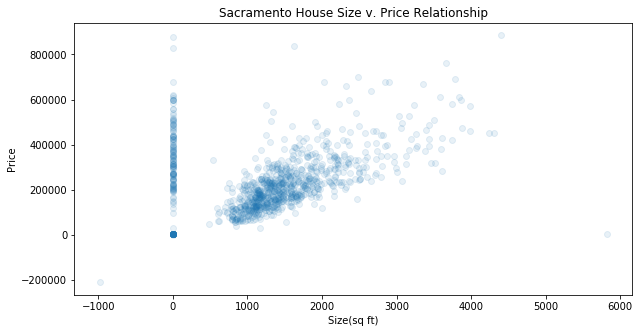

In [20]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of carat versus price.
plt.scatter(sac['sq__ft'],
           sac['price'],
           alpha= 0.1);

plt.title("Sacramento House Size v. Price Relationship")
plt.xlabel("Size(sq ft)")
plt.ylabel("Price")
plt.show();

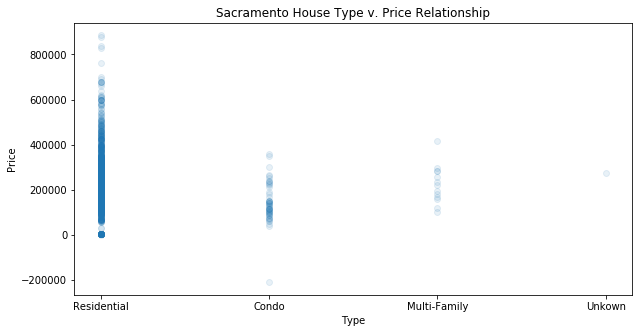

In [21]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of carat versus price.
plt.scatter(sac['type'],
           sac['price'],
           alpha= 0.1);

plt.title("Sacramento House Type v. Price Relationship")
plt.xlabel("Type")
plt.ylabel("Price")
plt.show();

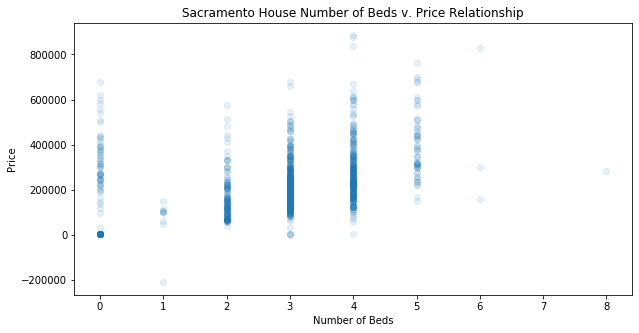

In [22]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of carat versus price.
plt.scatter(sac['beds'],
           sac['price'],
           alpha= 0.1);

plt.title("Sacramento House Number of Beds v. Price Relationship")
plt.xlabel("Number of Beds")
plt.ylabel("Price")
plt.show();

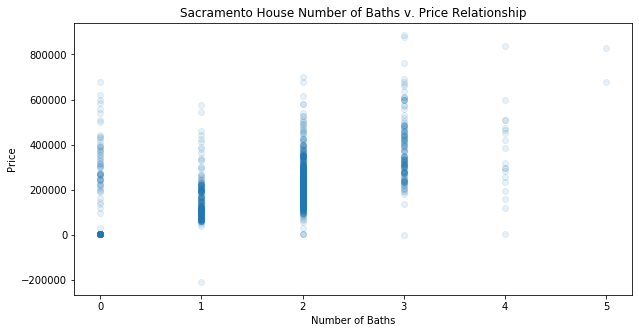

In [23]:
# Create a figure.
plt.figure(figsize=(10,5))

# Generate a scatterplot of carat versus price.
plt.scatter(sac['baths'],
           sac['price'],
           alpha= 0.1);

plt.title("Sacramento House Number of Baths v. Price Relationship")
plt.xlabel("Number of Baths")
plt.ylabel("Price")
plt.show();

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

A: The sq_ft column would be the best Y predictor in an SLR model because as the sq_ft increases, so does the price. The spread of predicted values get larger meaning no equality of variance of errors.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [24]:
# Define function.
def int_slope(x, y):

    # Calculate the five "ingredients."
    y_bar = y.mean()
    x_bar = x.mean()
    std_y = y.std()
    std_x = x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy * (std_y/std_x) #slope
    beta_0 = y_bar - beta_1*x_bar #y-intercept

    # Return line of best fit.
    print('slope')
    print(beta_1)
    
    print('y-intercept')
    print(beta_0)

In [25]:
int_slope(sac['sq__ft'],sac['price'])

slope
55.17721240500744
y-intercept
161272.7527792226


### 6. Interpret the intercept. Interpret the slope.

A: The slope estimated value of 55.1772 is interpreted as the square foot size of house is increased by one unit, the price is expected to rise by $55.1772.

For the intercept, if the square foot size is 0, the price is expected to be $161,272.7527.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

A: For business owners looking to buy office space for their employees can use this model to predict the cost of their office space purchase as square foot size is usually the first factor determined in buying office space.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

Residual formula: $\varepsilon_i = y_i - \hat{y}_i$

In [51]:
resids = y-preds

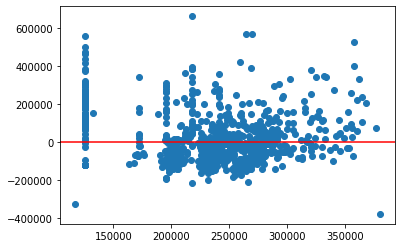

In [52]:
plt.scatter(preds,resids)
plt.axhline(0,color='red')

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [37]:
sac_dum = pd.get_dummies(sac['type'])

In [38]:
sac_dum.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [39]:
sac_dum.drop(columns='Unkown',inplace=True)

In [40]:
sac_dum.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [41]:
#https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe
sac = sac.join(sac_dum)

ValueError: columns overlap but no suffix specified: Index(['Condo', 'Multi-Family', 'Residential'], dtype='object')

In [42]:
list(sac.columns)

['street',
 'city',
 'zip',
 'state',
 'beds',
 'baths',
 'sq__ft',
 'type',
 'sale_date',
 'price',
 'latitude',
 'longitude',
 'Condo',
 'Multi-Family',
 'Residential',
 'Linear_Yhat']

In [43]:
sac=sac[['street',
 'city',
 'zip',
 'state',
 'beds',
 'baths',
 'sq__ft',
 'sale_date',
 'price',
 'latitude',
 'longitude',
 'Linear_Yhat',
 'type',
 'Condo',
 'Multi-Family',
 'Residential']]

In [44]:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,Linear_Yhat,type,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,207400.902350,Residential,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,225664.559656,Residential,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,205193.813854,Residential,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,208283.737748,Residential,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,205248.991066,Residential,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [45]:
# A: 
from sklearn import metrics
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [47]:
preds = lm.predict(X)

In [48]:
#MLR
#Y’i = b0 + b1X1i + b2X2i
X = sac[['sq__ft','Multi-Family','beds']]
y = sac['price']
lm.fit(X,y)
y_pred = lm.predict(X)
resids = y-preds


### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

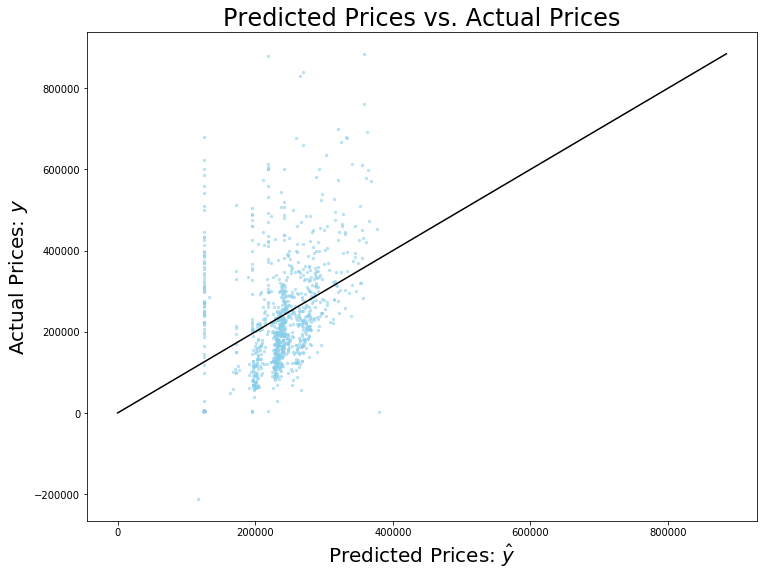

In [49]:
#A:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Prices: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Prices: $y$", fontsize = 20)
plt.title('Predicted Prices vs. Actual Prices', fontsize = 24);

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

A: My model doesn't seem to have a linear relationship with each independent X variables because the scatter plot show the points being no where close to the linear regression line and have points between $150,000 and $350,000 predicted values not even halfway of the predicted values. The lack of linearity also shows the possibility of x variables of being dependent as a vertical line is shown around $150,000 predicted value.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [50]:
def r2_adj(X,y):
    preds = lm.predict(X)
    resids = y-preds
    sse = np.sum((y-preds)**2)
    ssto = np.sum(null_resids**2)
    return 1 - sse/ssto

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [57]:
from sklearn import metrics

def six_r_metrics(X,y):
    preds = lm.predict(X)
    null_preds=y.mean()
    null_resids = y-null_preds
    mae = metrics.mean_absolute_error(y,preds)
    sse = np.sum((y-preds)**2)
    mse = metrics.mean_squared_error(y,preds)
    ssr = np.sqrt(metrics.mean_squared_error(y,preds))
    ssto = np.sum(null_resids**2)
    r_squared = metrics.r2_score(y,preds)
    print(f'MAE: {mae}')
    print(f'SSE: {sse}')
    print(f'MSE: {mse}')
    print(f'SSR: {ssr}')
    print(f'SSTO: {ssto}')
    print(f'R^2: {r_squared}')

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [58]:
six_r_metrics(X,y)

MAE: 96138.04209952823
SSE: 16328945618190.479
MSE: 16577609764.660385
SSR: 128754.06698299042
SSTO: 19036168349347.656
R^2: 0.14221468740320053


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

A: My model is high bias because most of data points are no where near close to the prediction model.